In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
kel=pd.read_csv('insurance.csv')
# df.sample()
kel.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [3]:
kel['smoker'] = kel['smoker'].replace({'no': 0, 'yes': 1}).replace("", np.nan).astype(float)
kel['sex']=kel['sex'].replace({'male': 0, 'female': 1}).replace("", np.nan).astype(float)

C:\Users\Student.DESK-13\AppData\Local\Temp\ipykernel_8768\1419634887.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  kel['smoker'] = kel['smoker'].replace({'no': 0, 'yes': 1}).replace("", np.nan).astype(float)
C:\Users\Student.DESK-13\AppData\Local\Temp\ipykernel_8768\1419634887.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  kel['sex']=kel['sex'].replace({'male': 0, 'female': 1}).replace("", np.nan).astype(float)


In [4]:
X=kel[['age','sex','smoker','bmi','children']].values
y=kel['charges'].values

In [9]:
X=(X-X.mean())/X.std()

In [10]:
def impute_loss(X,y,weight,bias):
    prediction= X @ weight + bias
    return np.mean((prediction - y.shape)**2)

In [11]:
def hyperparameter_gd(X_batch,y_batch,weight,bias,learning_rate=0.001):

    predictions=X_batch @ weight + bias
    error=np.mean((predictions - y_batch)**2)
    
    m = len(X_batch)
    predictions = X_batch @ weight + bias
    error = predictions - y_batch

    gradient_weight = (2/m)*(X_batch.T @ error)
    gradient_bias = (2/m) * np.sum(error)

    weight -= learning_rate * gradient_weight
    bias -= learning_rate * gradient_bias

    return weight, bias

In [12]:
def train(X,y,learning_rate,Epochs,batch_size):
    np.random.seed(42)
    weight = np.random.randn(X.shape[1])*0.001  

    bias=np.random.randn()*0.001
    loss_history=[]
    for i in range(Epochs):
        # indeces=np.arange(len(y))
        indeces  = np.random.permutation(len(y))
        X_full=X[indeces]
        y_full=y[indeces]
        for i in range(i,len(y),batch_size):
            X_batch=X_full[i:i+batch_size]
            y_batch=y_full[i:i+batch_size]
            weight,bias=hyperparameter_gd(X_batch,y_batch,weight,bias,learning_rate)
            loss=impute_loss(X,y,weight,bias)
            loss_history.append(loss)
    return loss_history

In [63]:
loss_min=train(X,y,0.0000001,10000,20)
print(f'min {loss_min}')
# loss_SDG=train(X,y,0.001,10000,1)
# print(f'sdg{loss_SDG}')
# # loss_full_b=train(X,y,0.001,10000,1)
# print(f' full{loss_full_b}')

min [np.float64(1790212.681934199), np.float64(1790183.990582397), np.float64(1790158.4897452923), np.float64(1790131.8109992296), np.float64(1790108.8803467038), np.float64(1790085.5114042414), np.float64(1790029.7714613727), np.float64(1789992.8107230857), np.float64(1789943.330262931), np.float64(1789901.1761813888), np.float64(1789863.996327051), np.float64(1789844.1163519751), np.float64(1789814.1267185004), np.float64(1789781.6964555564), np.float64(1789746.9480627282), np.float64(1789719.3817523445), np.float64(1789691.631767915), np.float64(1789654.78425699), np.float64(1789618.2467583946), np.float64(1789571.371680579), np.float64(1789519.7822250703), np.float64(1789496.4112080878), np.float64(1789461.3968621967), np.float64(1789429.8249157185), np.float64(1789406.438718619), np.float64(1789374.680546596), np.float64(1789342.3103882314), np.float64(1789301.594100486), np.float64(1789260.8951176072), np.float64(1789236.9216150125), np.float64(1789201.3647610196), np.float64(178

In [64]:
loss_SDG=train(X,y,0.00000001,10000,1)
print(f'sdg{loss_SDG}')

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [65]:
loss_full_b=train(X,y,0.00001,10000,batch_size=len(X))
print(f' full{loss_full_b}')

 full[np.float64(1786967.8026044508), np.float64(1783696.3276438944), np.float64(1780426.1040906785), np.float64(1777160.9683836543), np.float64(1773904.9873688153), np.float64(1770642.883395436), np.float64(1767379.4461382502), np.float64(1764135.8127382682), np.float64(1760881.8634126517), np.float64(1757647.8990686536), np.float64(1754401.3314971146), np.float64(1751162.8625699522), np.float64(1747929.8513823436), np.float64(1744701.3700861232), np.float64(1741472.2864772351), np.float64(1738257.9093053576), np.float64(1735041.5376112037), np.float64(1731824.8982615082), np.float64(1728621.9056371353), np.float64(1725413.67925683), np.float64(1722222.5166761298), np.float64(1719035.5243465363), np.float64(1715833.3157661948), np.float64(1712624.7852730132), np.float64(1709428.9737565496), np.float64(1706248.3901174718), np.float64(1703042.4885399851), np.float64(1699863.2038025747), np.float64(1696686.5959637407), np.float64(1693492.8861995172), np.float64(1690328.7584849384), np.fl

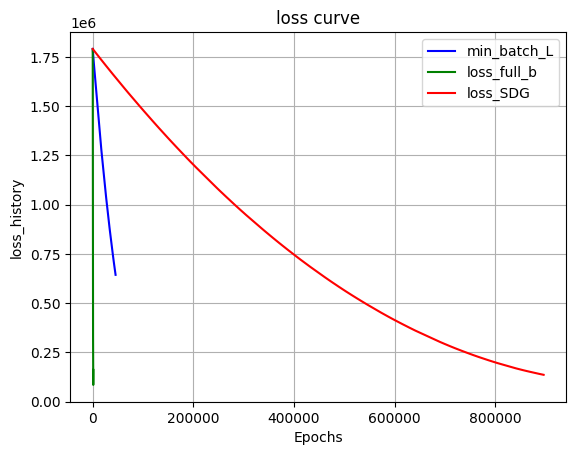

In [69]:
# plt.figure(figsize=(12,5))
plt.plot(loss_min,label='min_batch_L',color='blue')
plt.plot(loss_full_b,label='loss_full_b',color='green')
plt.plot(loss_SDG,label='loss_SDG',color='red')
plt.xlabel('Epochs')
plt.ylabel('loss_history')
plt.title('loss curve')
plt.grid(True)
plt.legend()
# plt.show()